# Data Analysis: 
## M. Zhang - Detecting Reference Errors in Scientific Literature with Large Language Models

In [12]:
import pandas as pd

# read the xlsx data into a pandas dataframe
df = pd.read_excel('../data/ReferenceErrorDetection_data.xlsx')

In [13]:
df.head()

,Source,Citing Article ID,Citing Article DOI,Citing Article Title,Citing Article Retracted,Citing Article Downloaded,Domain,Statement with Citation,Reference Article ID,Reference Article DOI,Reference Article Title,Reference Article Abstract,Reference Article PDF Available,Reference Article Retracted,Reference Article Downloaded,Label,Explanation
0,PubPeer,c001,10.1016/j.est.2021.103553,Heating a residential building using the heat ...,Yes,Yes,Engineering,Others have aimed to reduce irreversibility or...,r001,10.1155/2021/2087027,A Fault Analysis Method for Three-Phase Induct...,The fault prediction and abductive fault diagn...,Yes,No,Yes,Unsubstantiate,Irrelevant
1,PubPeer,c001,10.1016/j.est.2021.103553,Heating a residential building using the heat ...,Yes,Yes,Engineering,Some researchers have also studied various hea...,r002,10.1016/j.physa.2018.12.031,Develop 24 dissimilar ANNs by suitable archite...,The artificial neural network optimization met...,Yes,No,Yes,Unsubstantiate,Irrelevant
2,PubPeer,c002,10.1155/2022/4601350,Oxidative Potential and Nanoantioxidant Activi...,Yes,Yes,Chemistry,The relative content of total flavonoids in th...,r003,10.1088/1742-6596/1937/1/012038,Lipid Data Acquisition for devices Treatment o...,"Recently, the widespread deployment of smart p...",Yes,No,Yes,Unsubstantiate,Irrelevant
3,PubPeer,c003,10.1155/2022/2408685,The Choice of Anesthetic Drugs in Outpatient H...,Yes,Yes,Medicine,Research has shown that remimazolam tosylate e...,r004,10.1186/s12871-018-0543-3,"Effect of propofol on breast cancer cell, the ...",Breast cancer is the second leading cause of c...,Yes,No,Yes,Unsubstantiate,Irrelevant
4,PubPeer,c004,10.1155/2022/4783847,A Fault-Tolerant Structure for Nano-Power Comm...,Yes,Yes,Engineering,if the efficiency of the routing algorithm is ...,r005,10.36410/jcpr.2022.23.3.312,Analysis and research hotspots of ceramic mate...,"From the perspective of scientometrics, comb t...",Yes,No,Yes,Unsubstantiate,Irrelevant


In [14]:
total_entries = len(df)
# or
total_entries = df.shape[0]

print(total_entries)

250


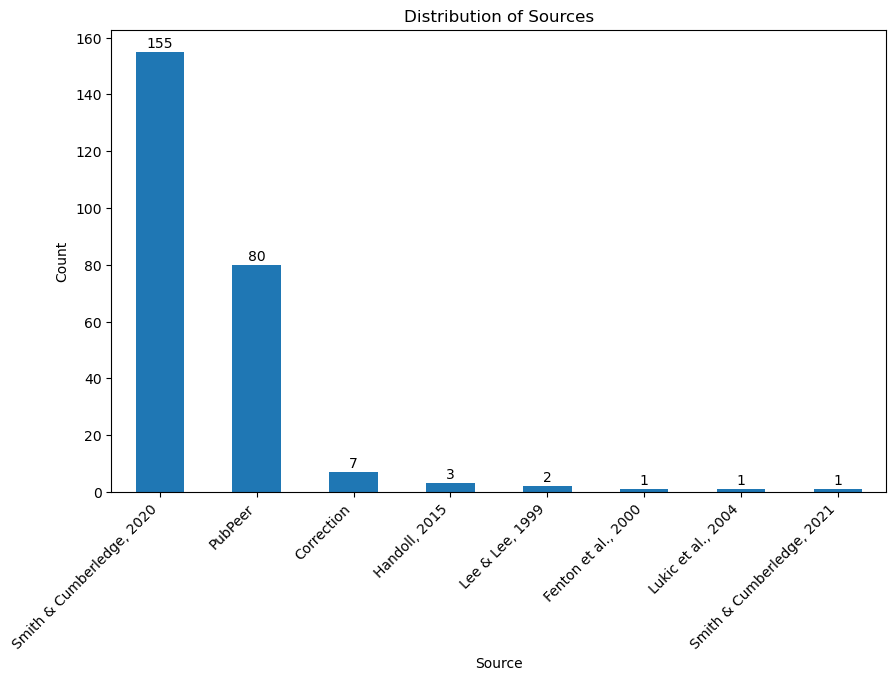

In [15]:
import matplotlib.pyplot as plt

# Count the occurrences of each source
source_counts = df['Source'].value_counts()

# Plot the bar diagram
plt.figure(figsize=(10, 6))
ax = source_counts.plot(kind='bar')
plt.title('Distribution of Sources')
plt.xlabel('Source')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add the total number above each bar, aligned vertically with the middle of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 3), 
                ha='center', va='center')

plt.show()

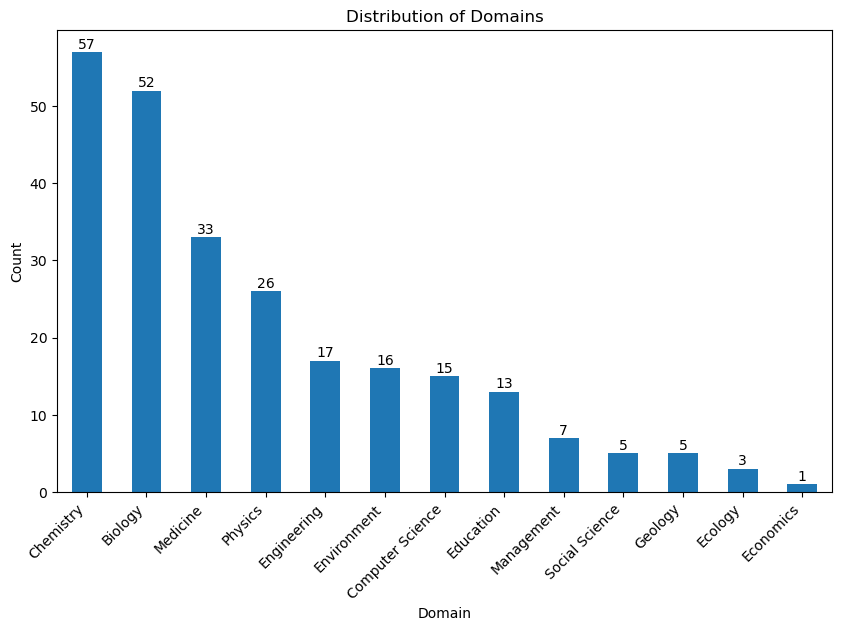

In [16]:
import matplotlib.pyplot as plt

# Count the occurrences of each source
source_counts = df['Domain'].value_counts()

# Plot the bar diagram
plt.figure(figsize=(10, 6))
ax = source_counts.plot(kind='bar')
plt.title('Distribution of Domains')
plt.xlabel('Domain')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add the total number above each bar, aligned vertically with the middle of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 1), 
                ha='center', va='center')
    
plt.show()

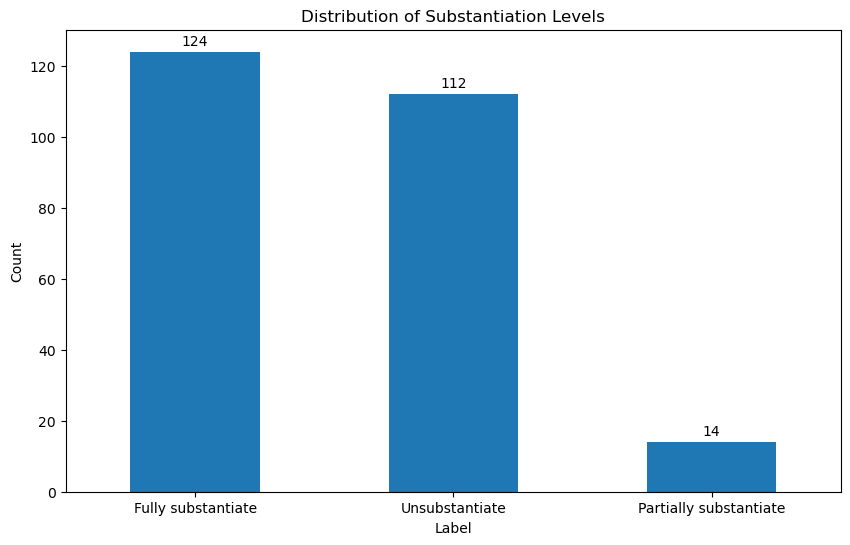

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of each source
source_counts = df['Label'].value_counts()

# Plot the bar diagram
plt.figure(figsize=(10, 6))
ax = source_counts.plot(kind='bar')
plt.title('Distribution of Substantiation Levels')
plt.xlabel('Label')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add the total number above each bar, aligned vertically with the middle of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 3), 
                ha='center', va='center')
    
plt.show()

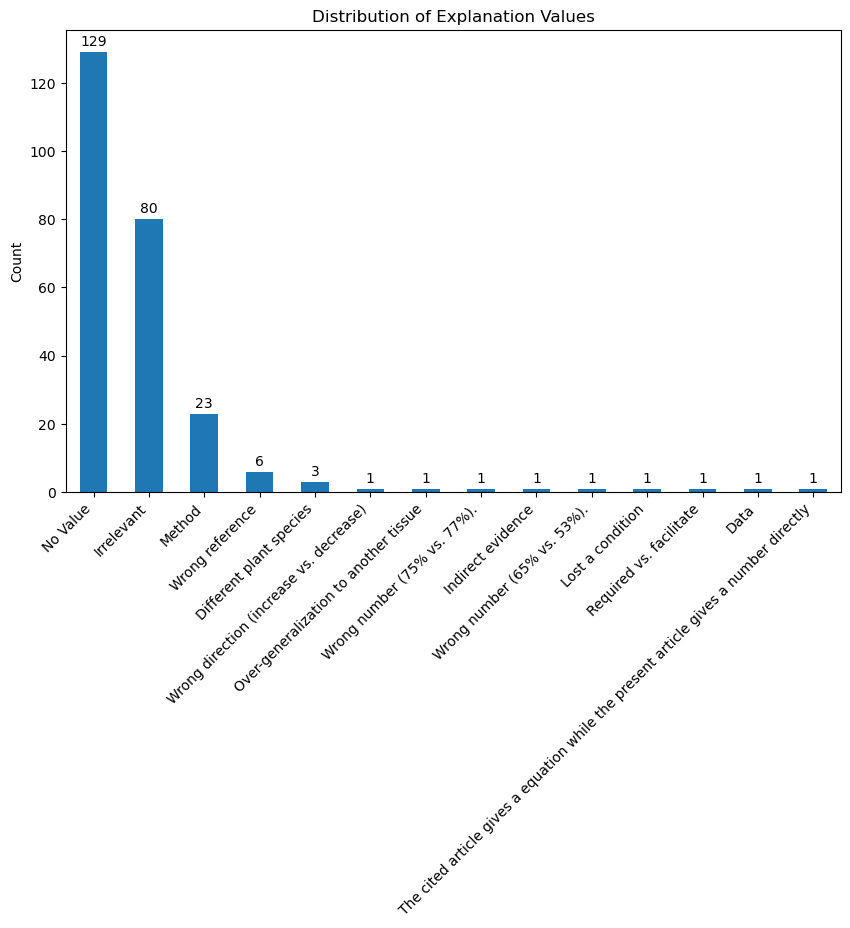

In [18]:
import matplotlib.pyplot as plt

# Fill missing values with 'No Value'
df['Explanation'] = df['Explanation'].fillna('No Value')

# Count the occurrences of each explanation
source_counts = df['Explanation'].value_counts()

# Plot the bar diagram
plt.figure(figsize=(10, 6))
ax = source_counts.plot(kind='bar')
plt.title('Distribution of Explanation Values')
plt.xlabel('')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add the total number above each bar, aligned vertically with the middle of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 3), 
                ha='center', va='center')
    
plt.show()

### Retracted Articles Analysis

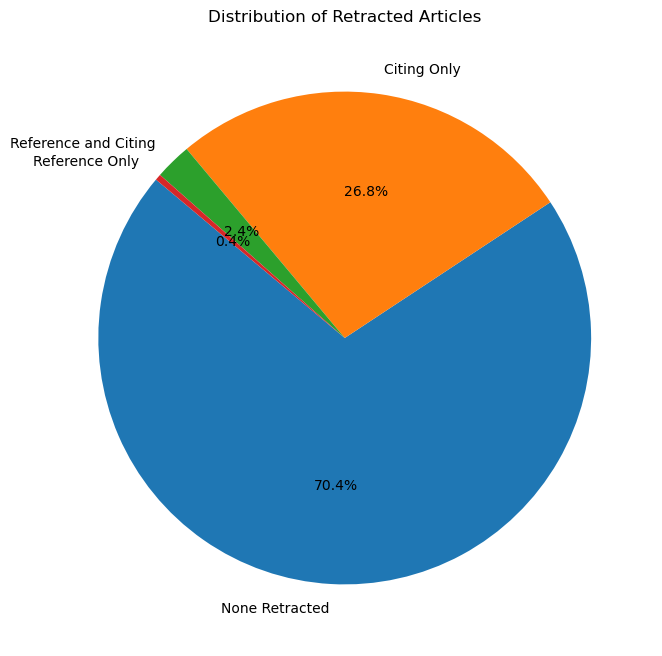

In [19]:
# Create a new column to categorize the rows
df['Retracted Status'] = df.apply(lambda row: 'Reference and Citing' if row['Citing Article Retracted'] == 'Yes' and row['Reference Article Retracted'] == 'Yes' else 
                                  ('Citing Only' if row['Citing Article Retracted'] == 'Yes' else 
                                   ('Reference Only' if row['Reference Article Retracted'] == 'Yes' else 'None Retracted')), axis=1)

# Count the occurrences of each category
retracted_counts = df['Retracted Status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(retracted_counts, labels=retracted_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Retracted Articles')
plt.show()

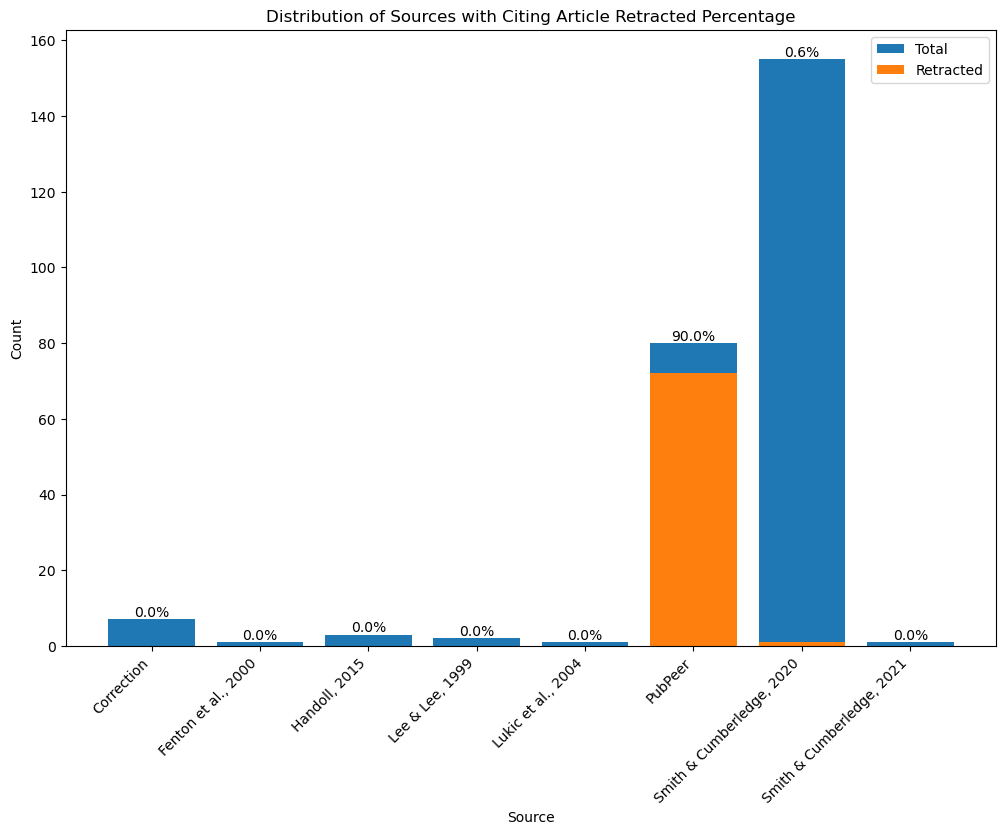

In [20]:
import matplotlib.pyplot as plt

# Calculate the total count and the count of 'Yes' for 'Citing Article Retracted' for each source
source_total_counts = df['Source'].value_counts()
source_retracted_counts = df[df['Citing Article Retracted'] == 'Yes']['Source'].value_counts()

# Calculate the percentage of 'Yes' for 'Citing Article Retracted'
source_retracted_percentage = (source_retracted_counts / source_total_counts) * 100

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Total': source_total_counts,
    'Retracted': source_retracted_counts,
    'Retracted Percentage': source_retracted_percentage
}).fillna(0)

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(plot_data.index, plot_data['Total'], label='Total')
plt.bar(plot_data.index, plot_data['Retracted'], label='Retracted')

# Add the percentage labels
for bar, percentage in zip(bars, plot_data['Retracted Percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribution of Sources with Citing Article Retracted Percentage')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()